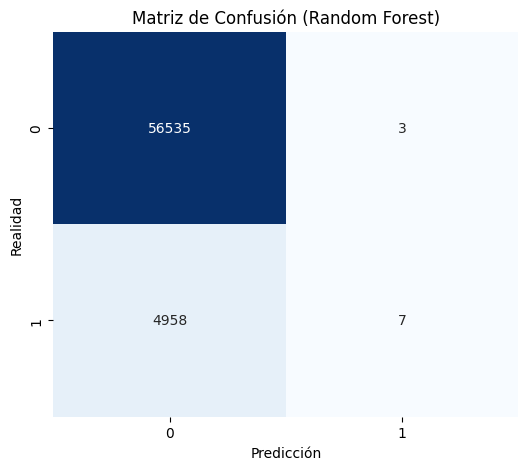

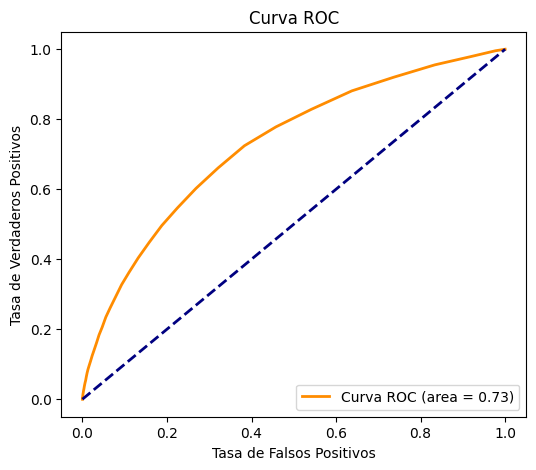

In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc

# 1. Cargar datos y modelo
df = pd.read_csv("../data/processed/train_final.csv")
modelo = joblib.load("../artifacts/modelo_riesgo.pkl")

# 2. Recrear el set de prueba (Usando la misma semilla 42 que en el entrenamiento)
X = df.drop(columns=['TARGET', 'SK_ID_CURR'])
y = df['TARGET']
_, X_test, _, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Predicciones
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# --- GRÁFICO 1: Matriz de Confusión ---
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión (Random Forest)')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

# --- GRÁFICO 2: Curva ROC ---
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()